## Importing Dependencies

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [2]:
import warnings 
warnings.filterwarnings('ignore')

## Data Collection and Analysis

In [3]:
# Loading data directly from github repository using raw function
insdf=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")

In [4]:
insdf 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


There are 1338 rows and 7 columns. "charges" is our target variable. It's a linear regression problem as we can see the presence of continuous numerical values. Features like sex,smoker,region have categorical and string data. 

In [5]:
# getting some information about the dataset
insdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Based on the above output, there are no missing values and 2 columns have float datatype , 2 have int and others have object datatype.

In [6]:
# statistical measures of dataset
insdf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


from the above output we can see the count,mean,standard deviation,percentiles for all columns with numerical data

In [7]:
# Defining numerical and categorical columns
numerical_cols = ['age', 'bmi','children', 'charges']
categorical_cols = ['sex', 'smoker', 'region']

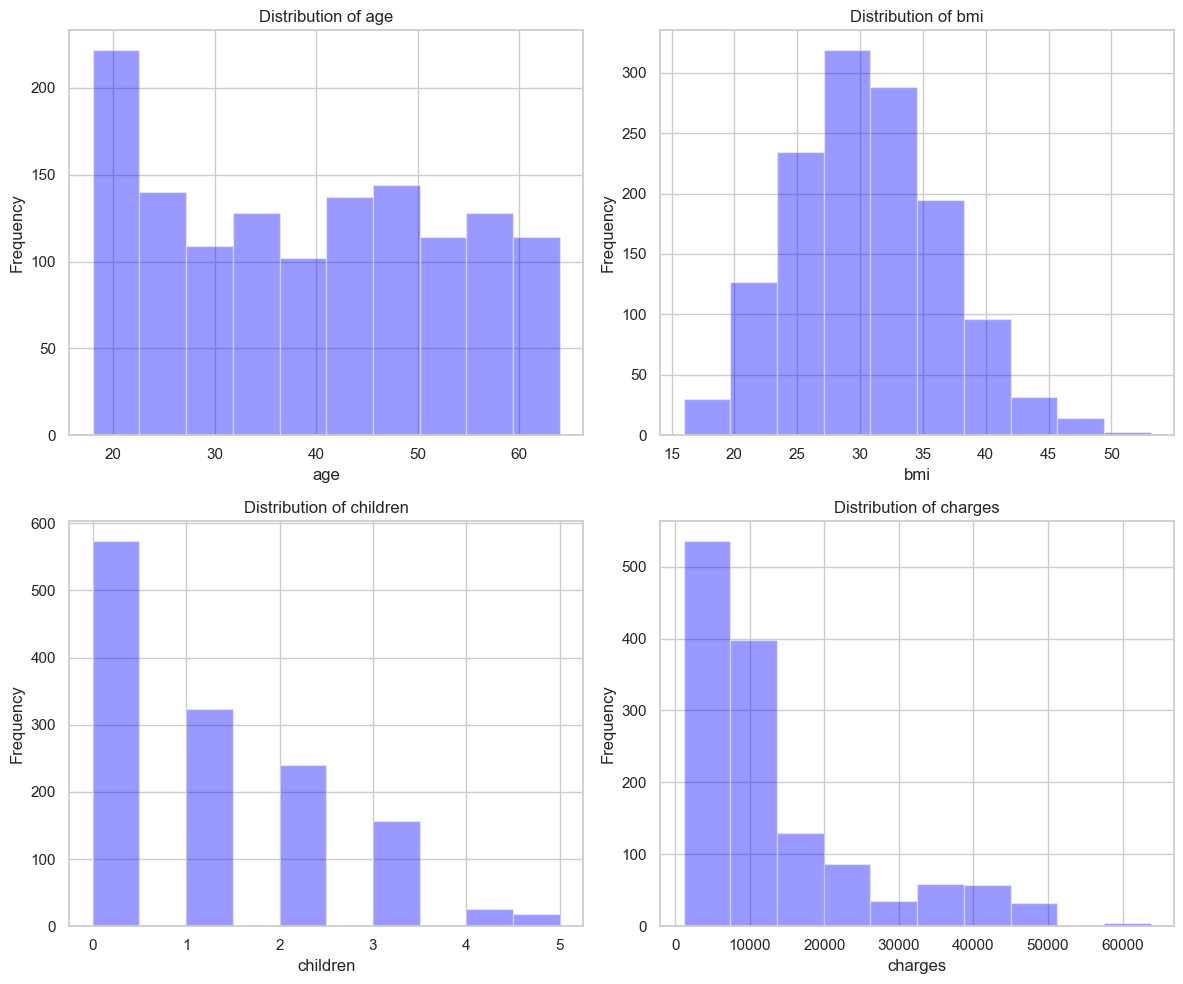

In [8]:
# Setting the style of seaborn
sns.set(style="whitegrid")

# Creating subplots for distplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Iterating over numerical columns and creating distplots
for i, col in enumerate(numerical_cols):
    sns.distplot(insdf[col], kde=False, color='blue', bins=10, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The distplots show that many people in the dataset are around 20 years old, but the number of people decreases as age increases. BMI (body mass index) looks like a typical curve you might see, like a hill. Most people in the dataset don't have any kids, and very few have four or five. When it comes to medical costs, there's a group of people who have costs around $10,000, but not as many with higher or lower costs.

<Axes: xlabel='charges', ylabel='Density'>

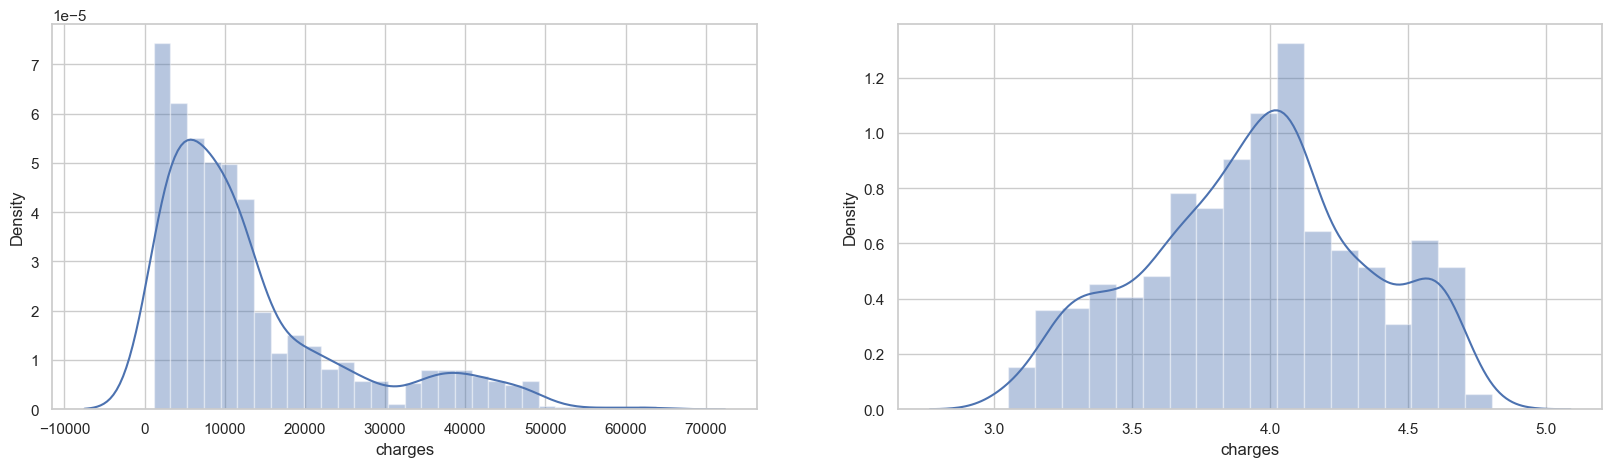

In [9]:
# Distribution of the charges
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(insdf.charges, color = 'b')

# Natural Log for approximately normal distribution
plt.subplot(1,2,2)
sns.distplot(np.log10(insdf.charges), color = 'b')

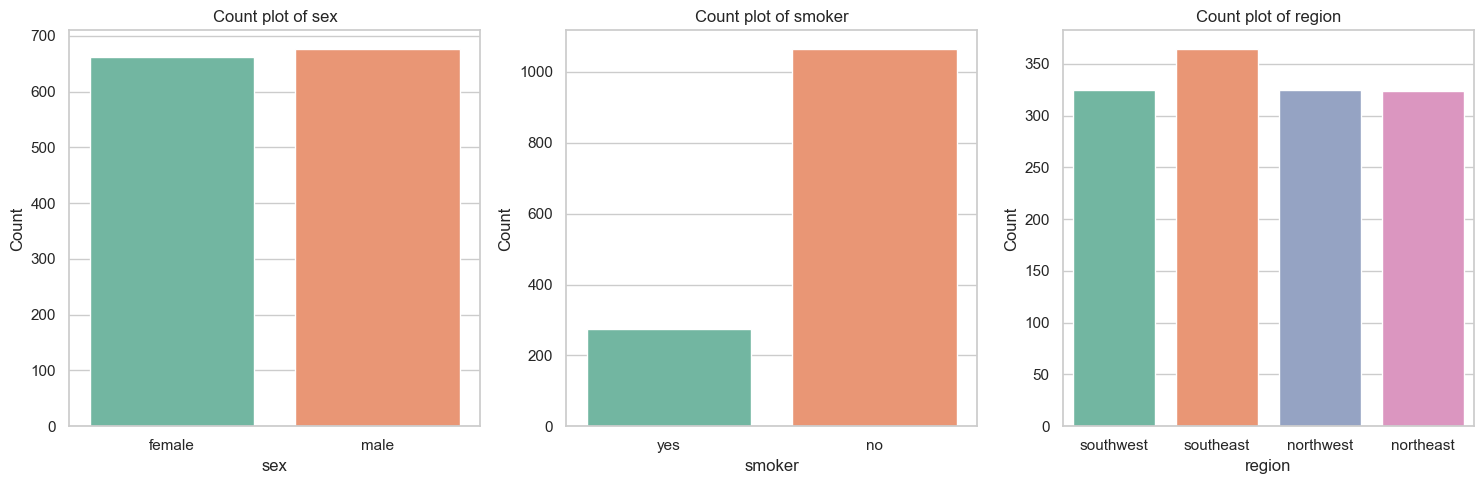

In [10]:
# Creating subplots for count plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterating over categorical columns and creating count plots
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=insdf, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Count plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In the countplots, it's noticeable that there are many more non-smokers compared to smokers. The counts for features like sex and region are mostly similar, except for the southeast region, which has a slightly higher count compared to the others.

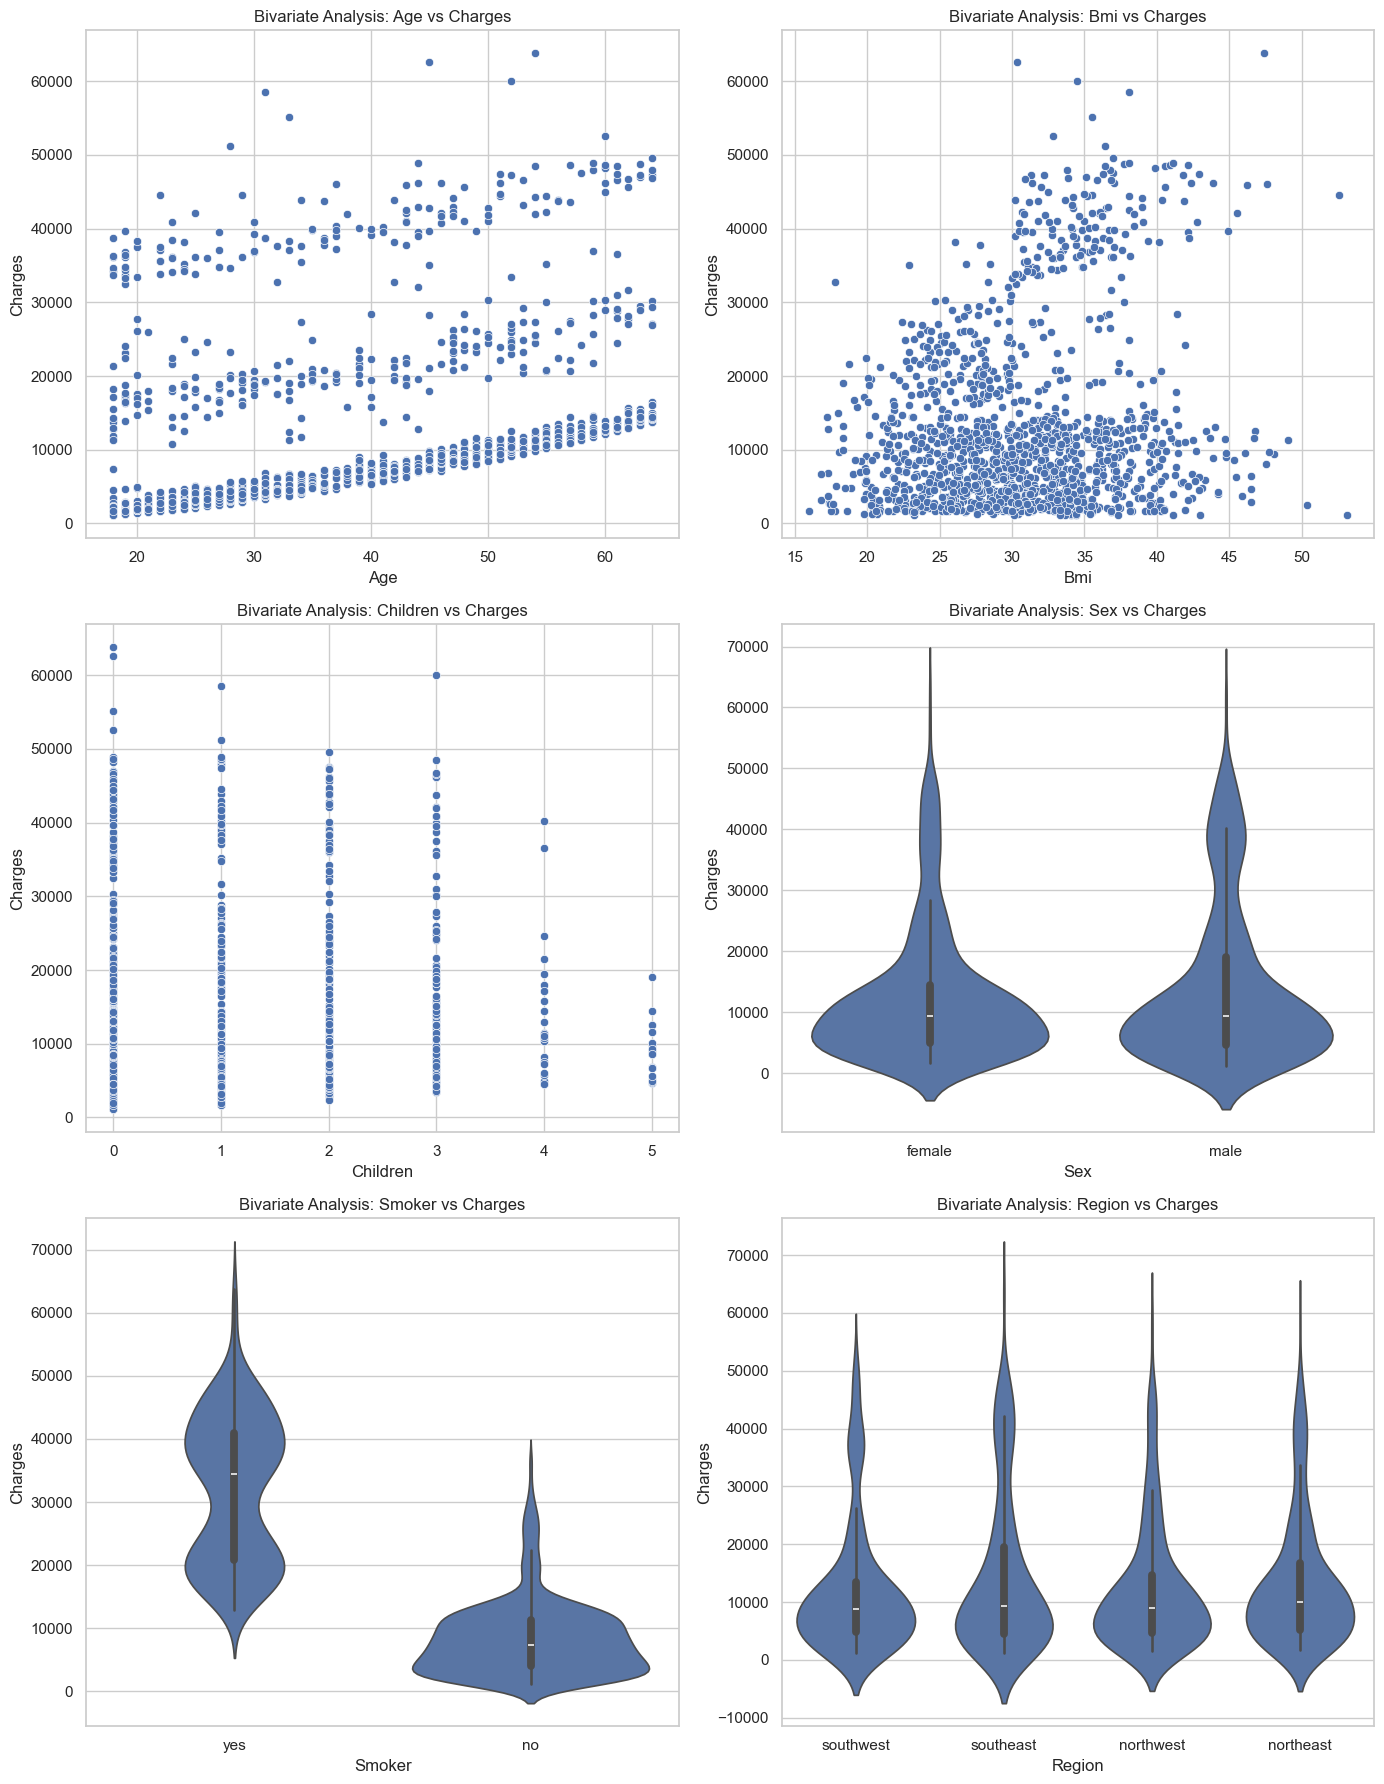

In [12]:
# Defining features for bivariate analysis
num = ['age', 'bmi', 'children']
cat = ['sex', 'smoker', 'region']

# Creating a grid layout of 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Iterating over numerical features and plot scatterplots
for i, feature in enumerate(num):
    sns.scatterplot(x=feature, y='charges', data=insdf, ax=axes[i])
    axes[i].set_title(f'Bivariate Analysis: {feature.capitalize()} vs Charges')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Charges')

# Iterating over categorical features and plot violin plots
for i, feature in enumerate(cat, start=len(num)):
    sns.violinplot(x=feature, y='charges', data=insdf, ax=axes[i])
    axes[i].set_title(f'Bivariate Analysis: {feature.capitalize()} vs Charges')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Charges')

# Hide empty subplots if the number of features is less than 6
for j in range(len(num) + len(cat), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


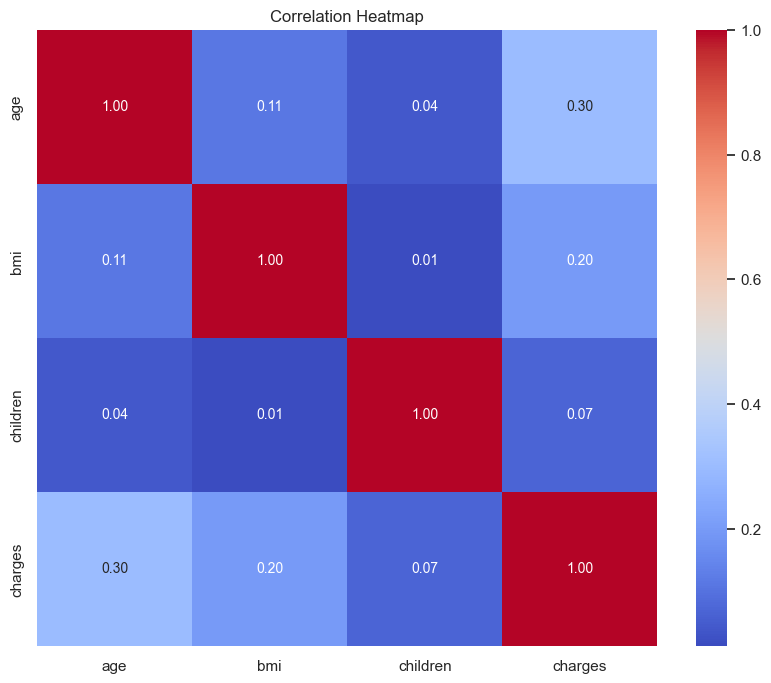

In [13]:
# Calculating the correlation matrix
corr_matrix = insdf.corr()

# Ploting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

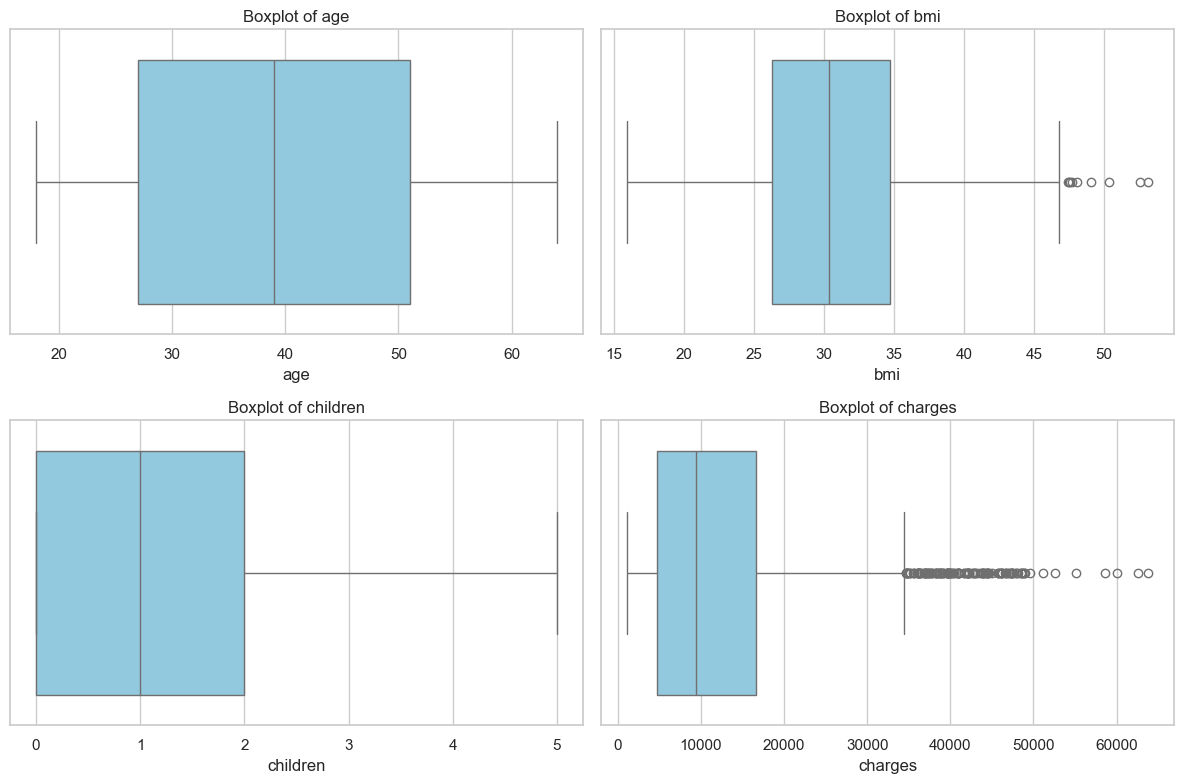

In [14]:
# Creating boxplots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=insdf[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

we can see the IQR and presence of outliers in bmi and charges columns.

## Data Pre-Processing

### Encoding the categorical columns

In [15]:
# Encoding sex column
insdf.replace({'sex':{'male':0,'female':1}},inplace=True)
# Encoding smoker column
insdf.replace({'smoker':{'yes':0,'no':1}},inplace=True)
# Encoding region column
insdf.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [16]:
insdf

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


we have successfully encoded our categorical columns

### Splitting the dataset into x and y variable

In [17]:
X=insdf.drop(columns='charges',axis=1)
Y=insdf['charges']

In [18]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [19]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Splitting the data into training data and testing data

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [21]:
X_train.shape

(1070, 6)

In [22]:
Y_train.shape

(1070,)

In [23]:
X_test.shape

(268, 6)

In [24]:
Y_test.shape

(268,)

# Model training and Evaluation

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)
rf_y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(Y_test, rf_y_pred)
rf_mae = mean_absolute_error(Y_test, rf_y_pred)
rf_r2 = r2_score(Y_test, rf_y_pred)

print("Random Forest Regressor:")
print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)
print("R-squared Score:", rf_r2)

Random Forest Regressor:
Mean Squared Error: 20605006.150018733
Mean Absolute Error: 2513.182938517853
R-squared Score: 0.8672774588750145


In [29]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
lr_y_pred = lr_model.predict(X_test)

lr_mse = mean_squared_error(Y_test, lr_y_pred)
lr_mae = mean_absolute_error(Y_test, lr_y_pred)
lr_r2 = r2_score(Y_test, lr_y_pred)

print("\nLinear Regression:")
print("Mean Squared Error:", lr_mse)
print("Mean Absolute Error:", lr_mae)
print("R-squared Score:", lr_r2)


Linear Regression:
Mean Squared Error: 33685623.354144424
Mean Absolute Error: 4190.220190137915
R-squared Score: 0.783021587162344


After analysing both models we can say that random forest regressor model performed better that linear regression

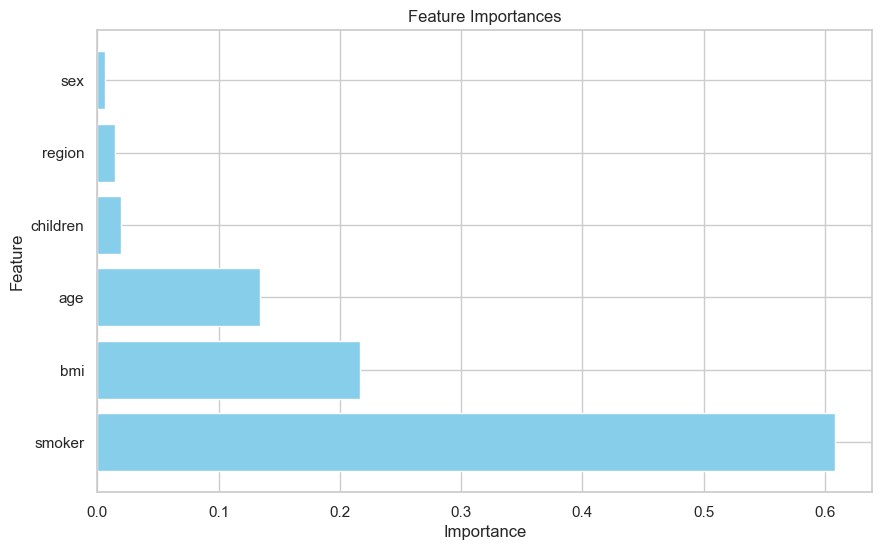

In [30]:
# Get feature importances for random forest regressor
feature_importances = rf_model.feature_importances_

# Creating a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

## Saving the Random Foreset Regressor Model

In [31]:
import joblib

In [32]:
# Defining the file path to save the model
model_file_path = 'random_forest_model.pkl'

# Saving the model to a file
joblib.dump(rf_model, model_file_path)

['random_forest_model.pkl']